<h2>Foundation of Euler’s Formula</h2>

<h3>What Is Euler’s Formula?</h3>
<p>
<code>e<sup>ix</sup> = cos(x) + i·sin(x)</code>
</p>

<p>
This beautiful identity <strong>is not a definition</strong> — it is a <strong>derived result</strong> from deeper mathematical ideas.
It originates from the <em>Taylor series</em> (a.k.a. Maclaurin series), which are infinite polynomials that approximate functions.
</p>

<hr />

<h3>Step 1: Recall the Taylor Series of Basic Functions</h3>

<h4>Exponential Function:</h4>
<pre>
e<sup>x</sup> = 1 + x + x²/2! + x³/3! + x⁴/4! + ⋯
</pre>

<p>Now substitute <code>x = ix</code> into the series:</p>

<pre>
e<sup>ix</sup> = 1 + ix + (ix)²/2! + (ix)³/3! + (ix)⁴/4! + ⋯
</pre>

<h4>Let’s simplify the powers of <code>i</code>:</h4>
<ul>
  <li><code>i⁰ = 1</code></li>
  <li><code>i¹ = i</code></li>
  <li><code>i² = -1</code></li>
  <li><code>i³ = -i</code></li>
  <li><code>i⁴ = 1</code></li>
  <li><em>... (cycles every 4 terms)</em></li>
</ul>

<hr />

<h3>Step 2: Simplify Term-by-Term</h3>

<pre>
e<sup>ix</sup> = 1 + ix - x²/2! - i·x³/3! + x⁴/4! + i·x⁵/5! - ⋯
</pre>

<p>Group real and imaginary parts:</p>

<h4>Real Part:</h4>
<pre>
1 - x²/2! + x⁴/4! - ⋯ = cos(x)
</pre>

<h4>Imaginary Part:</h4>
<pre>
ix - i·x³/3! + i·x⁵/5! - ⋯ = i(sin(x))
</pre>

<hr />

<h3>Final Result: Euler’s Formula</h3>
<pre>
e<sup>ix</sup> = cos(x) + i·sin(x)
</pre>

<p>
This is <strong>Euler’s Formula</strong> — not an assumption, but a <strong>natural result</strong> from Taylor series.
</p>

<hr />

<h3>Intuition Recap</h3>
<ul>
  <li><code>e<sup>ix</sup></code> is a complex exponential — a rotating point in the complex plane.</li>
  <li>The <strong>real part</strong> is <code>cos(x)</code></li>
  <li>The <strong>imaginary part</strong> is <code>sin(x)</code></li>
</ul>

<p>
So <code>e<sup>ix</sup></code> = rotation + oscillation.
</p>

<hr />

<h3>Why This Is So Profound</h3>

<p>Euler’s formula unites:</p>

<table>
  <thead>
    <tr><th>Concept</th><th>Expression</th><th>Meaning</th></tr>
  </thead>
  <tbody>
    <tr><td><strong>Growth</strong></td><td><code>e<sup>x</sup></code></td><td>Exponential change</td></tr>
    <tr><td><strong>Oscillation</strong></td><td><code>sin(x), cos(x)</code></td><td>Cyclic behavior</td></tr>
    <tr><td><strong>Complexity</strong></td><td><code>i</code></td><td>Rotation in the complex plane</td></tr>
  </tbody>
</table>

<p>
Together, they form the <strong>core language</strong> of Fourier analysis.
</p>


<hr>

### Goal of Continuous Fourier Transform (CFT)

Problem:
Given a continuous-time signal x(t)x(t), we want to understand what frequencies are present, and how strongly they appear in the signal.

<h2>The Formula (Definition)</h2>

<p>
  The Continuous Fourier Transform is defined as:
</p>

<pre>
X(f) = ∫<sub>−∞</sub><sup>∞</sup> x(t) · e<sup>−2πift</sup> dt
</pre>

<h3>Where:</h3>
<ul>
  <li><strong>x(t)</strong> is the signal in the <em>time domain</em></li>
  <li><strong>f</strong> is the <em>frequency</em> (in Hz), a real number</li>
  <li><strong>X(f)</strong> is the <em>complex spectrum</em> in the <em>frequency domain</em></li>
  <li>
    <strong>e<sup>−2πift</sup></strong> = cos(2πft) − i·sin(2πft) &nbsp; 
    <em>(Euler’s formula)</em>
  </li>
</ul>


In [2]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_signal(frequency, time):
    sin = np.sin(2 * np.pi * (frequency * time))
    sin2 = np.sin(2 * np.pi * (2 * frequency * time))
    sin3 = np.sin(2 * np.pi * (3 * frequency * time))

    return sin + sin2 + sin3

In [4]:
def calculate_center_of_gravity(mult_signal):
    x_centre = np.mean([x.real for x in mult_signal])
    y_centre = np.mean([x.imag for x in mult_signal])
    return x_centre, y_centre

In [5]:
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum

In [6]:
def create_pure_tone(frequency, time):
    angle = -2 * np.pi * frequency * time
    return np.cos(angle) + 1j * np.sin(angle)

In [7]:
def plot_fourier_transform(pure_tone_frequency, 
                           signal_frequency, 
                           time, 
                           plot_center_of_gravity=False,
                           plot_sum=False):
    
    # create sinusoid and signal
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time)
    
    # multiply pure tone and signal
    mult_signal = pure_tone * signal
    
    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]

    plt.figure(figsize=(15, 10))
    plt.plot(X, Y) # remove 'o' to get line graphs / add 'o' for points on graphs

    # calculate and plot centre of gravity
    if plot_center_of_gravity:
        center_of_gravity = calculate_center_of_gravity(mult_signal)
        plt.plot([center_of_gravity[0]], [center_of_gravity[1]], marker='o', markersize=10, color="red")


    # calculate and plot sum 
    if plot_sum:
        integral = calculate_sum(mult_signal)
        plt.plot([integral[0]], [integral[1]], marker='o', markersize=10, color="green")

    
    # set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)

    plt.show()

In [8]:
def plot_signal(signal, time):
    plt.figure(figsize=(15, 10))
    plt.plot(signal, time)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

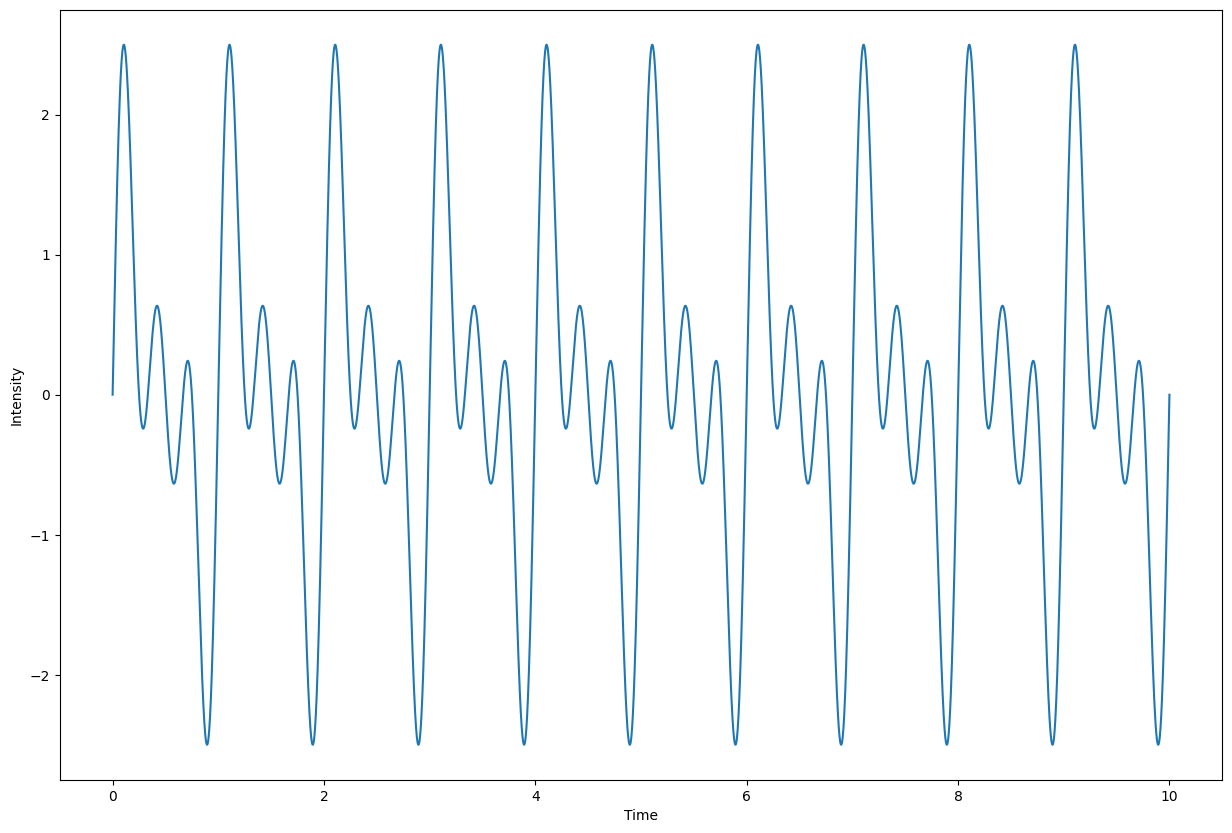

In [9]:
time = np.linspace(0, 10, 10000)
signal = create_signal(frequency=1, time=time)
plot_signal(time, signal)

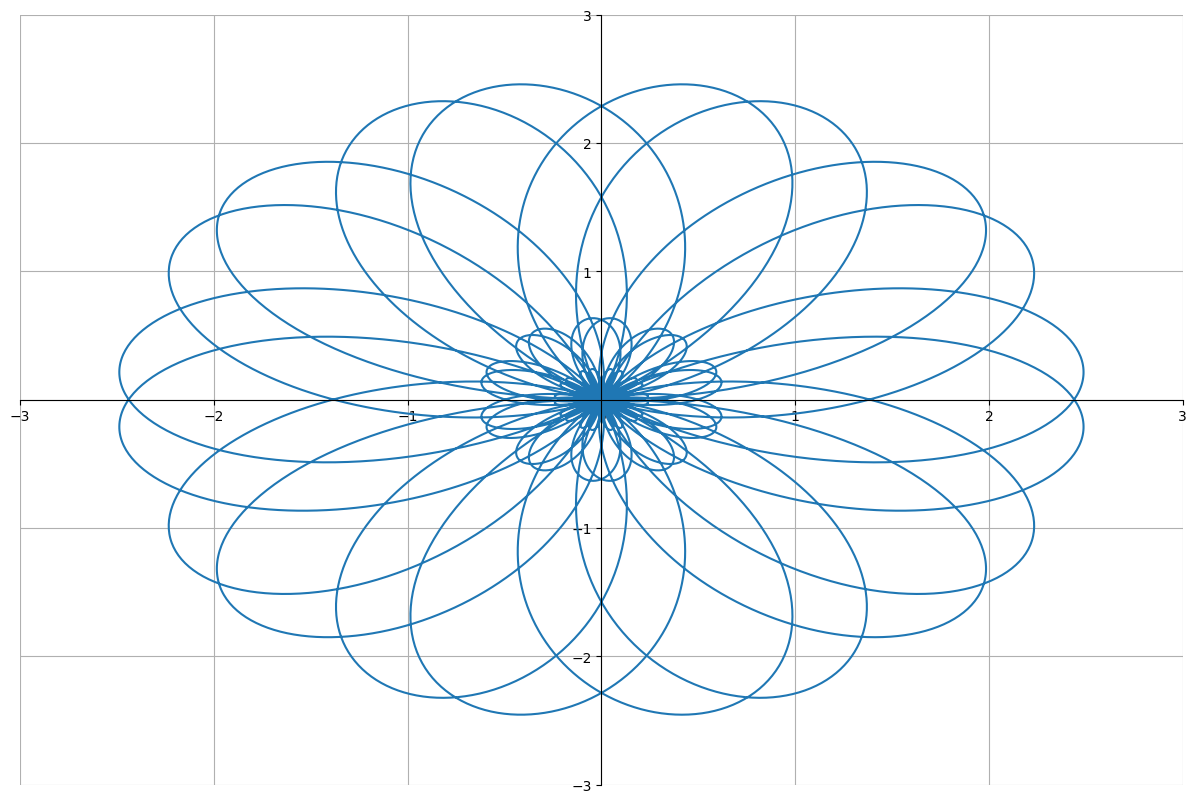

In [10]:
time = np.linspace(0, 10, 10000)
plot_fourier_transform(pure_tone_frequency=1.1,
                       signal_frequency=1,
                       time=time)

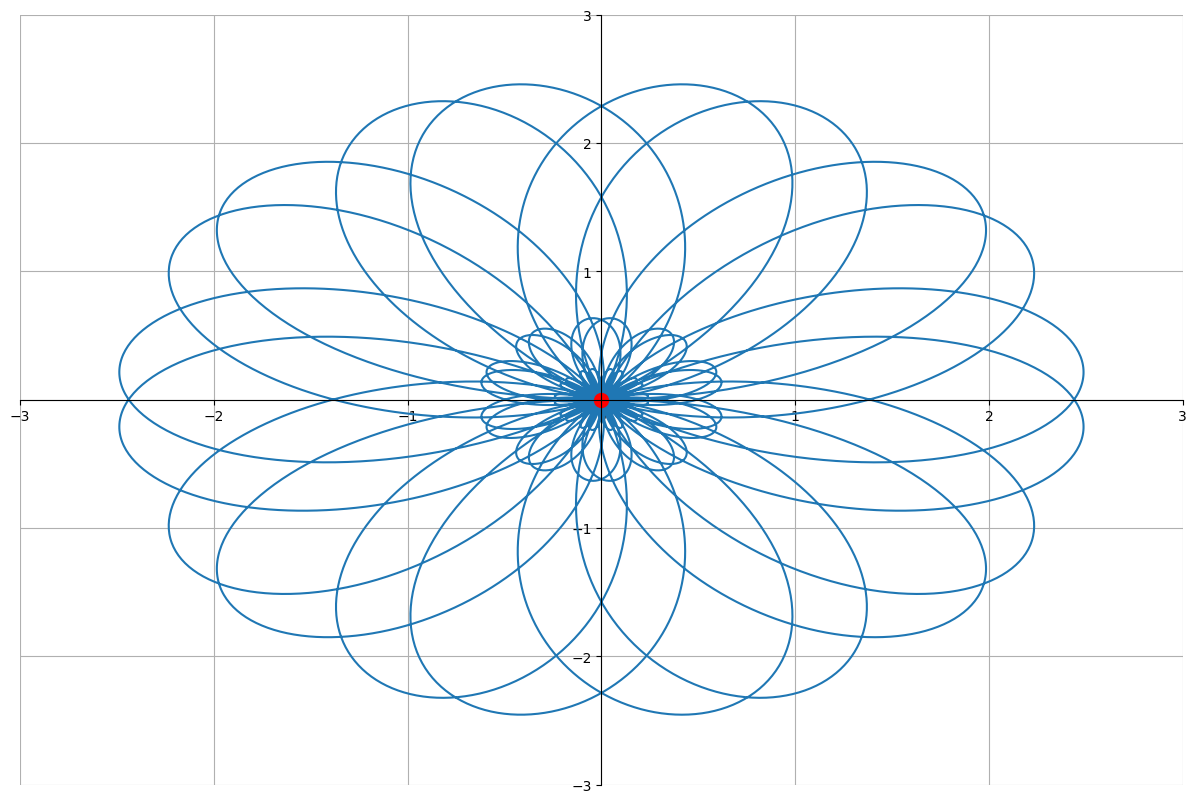

In [12]:
time = np.linspace(0, 10, 10000)
plot_fourier_transform(pure_tone_frequency=1.1,
                       signal_frequency=1,
                       time=time,
                       plot_center_of_gravity=True,
                       plot_sum=False)

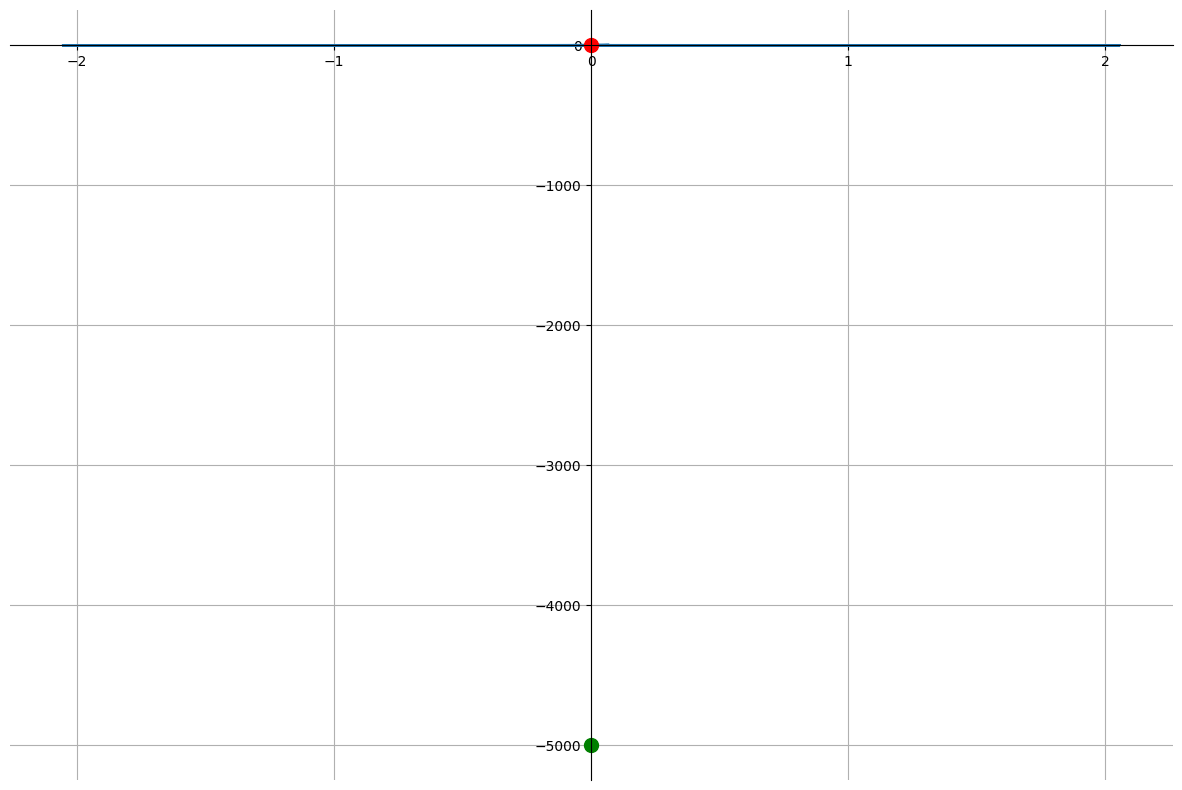

In [14]:
time = np.linspace(0, 10, 10000)
plot_fourier_transform(pure_tone_frequency=1,
                       signal_frequency=1,
                       time=time,
                       plot_center_of_gravity=True,
                       plot_sum=True)